In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import datetime
plt.style.use('fivethirtyeight')

In [2]:
security = '000300.XSHG'
his_period = 60  # 历史时间
timeStruct = datetime.datetime.now().strftime("%Y-%m-%d")
df = get_price(security, start_date="2012-06-05", end_date=timeStruct, frequency='daily')
df[:3]
print(df)

               open    close     high      low        volume         money
2005-01-04  1260.78  1242.77  1260.78  1238.18  8.161770e+08  4.418452e+09
2005-01-05  1241.68  1251.94  1258.58  1235.75  8.678651e+08  4.916589e+09
2005-01-06  1252.49  1239.43  1252.73  1234.24  7.922254e+08  4.381370e+09
2005-01-07  1239.32  1244.75  1256.31  1235.51  8.940871e+08  5.040042e+09
2005-01-10  1243.58  1252.40  1252.72  1236.09  7.234683e+08  4.118292e+09
...             ...      ...      ...      ...           ...           ...
2022-10-17  3060.52  3084.94  3087.19  3052.71  2.626086e+10  3.492145e+11
2022-10-18  3094.93  3080.96  3099.92  3074.22  2.456348e+10  3.260029e+11
2022-10-19  3073.26  3044.38  3081.39  3044.38  2.308953e+10  3.131083e+11
2022-10-20  3029.30  3035.05  3070.26  3013.69  2.447361e+10  3.400913e+11
2022-10-21  3038.04  3038.93  3055.42  3026.96  2.452541e+10  3.151110e+11

[4324 rows x 6 columns]


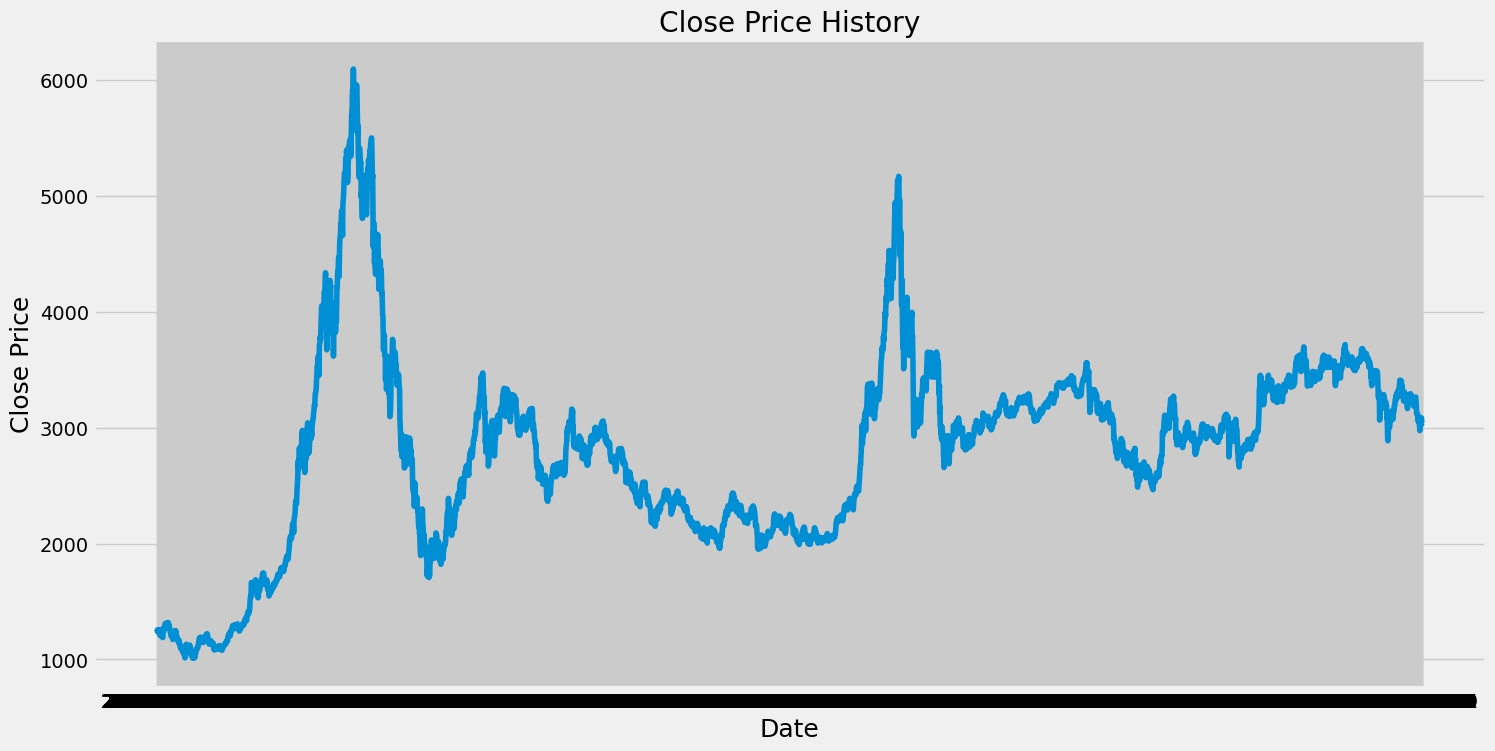

<Figure size 640x480 with 0 Axes>

In [3]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['close'], label='Close')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()
plt.savefig('close_price.png')

In [5]:
ShortEMA = df.close.ewm(span=12, adjust=False).mean()
LongEMA = df.close.ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

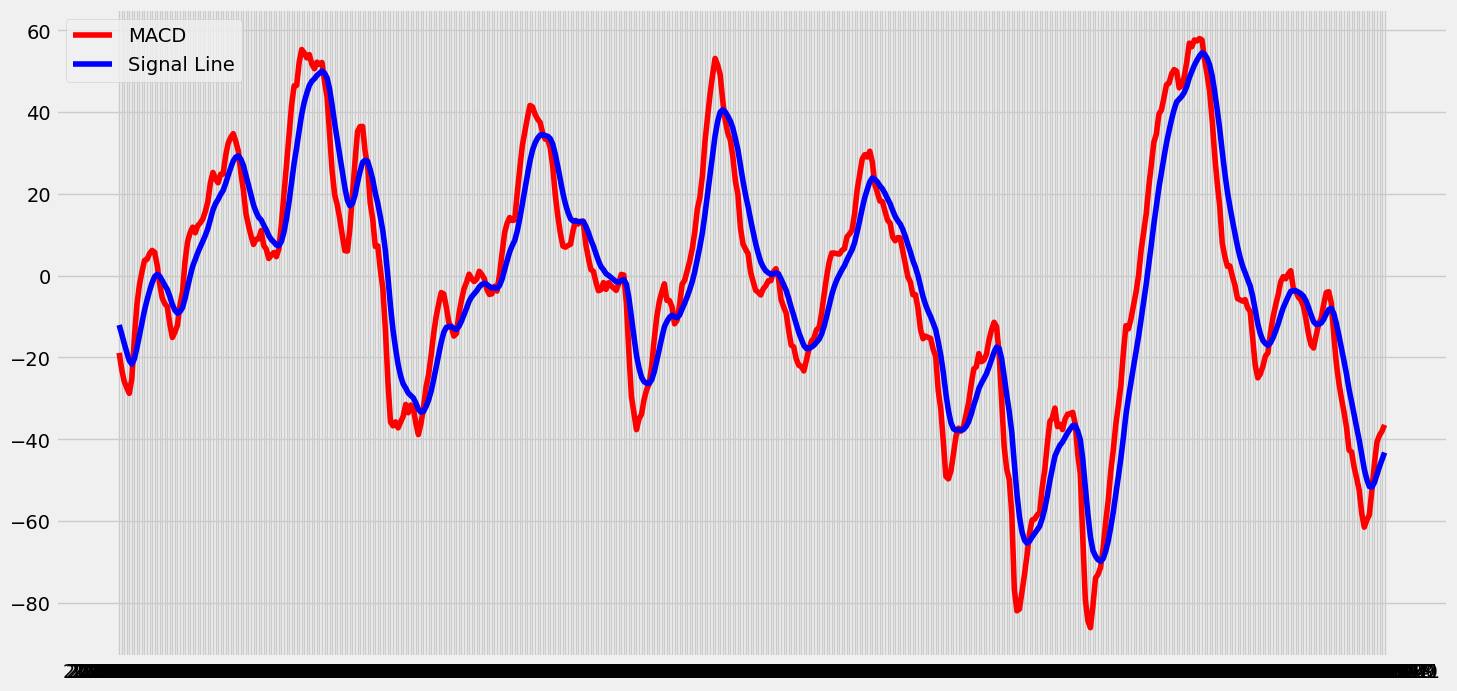

In [ ]:
period = 500  # 可视化范围
plt.figure(figsize=(16,8))
plt.plot(df.index[-period:], MACD[-period:], label="MACD", color='red')
plt.plot(df.index[-period:], signal[-period:], label='Signal Line', color='blue')
plt.legend(loc='upper left')
plt.show()
plt.savefig("Signal_Line.jpg")

In [6]:
df['MACD'] = MACD
df['Signal Line'] = signal
df.tail()

,open,close,high,low,volume,money,MACD,Signal Line
2022-10-17,3060.52,3084.94,3087.19,3052.71,2.626086e+10,3.492145e+11,-45.915320,-50.572409
2022-10-18,3094.93,3080.96,3099.92,3074.22,2.456348e+10,3.260029e+11,-40.670314,-48.591990
2022-10-19,3073.26,3044.38,3081.39,3044.38,2.308953e+10,3.131083e+11,-39.015561,-46.676704
2022-10-20,3029.30,3035.05,3070.26,3013.69,2.447361e+10,3.400913e+11,-38.018755,-44.945114
2022-10-21,3038.04,3038.93,3055.42,3026.96,2.452541e+10,3.151110e+11,-36.495003,-43.255092


In [7]:
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                # 买入信号
                Buy.append(signal['close'][i])
                flag = 1
            else:
                Buy.append(np.nan)
        elif signal['MACD'][i] < signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                # 卖出信号
                Sell.append(signal['close'][i])
                flag = 0
            else:
                Sell.append(np.nan)
        else:
            Buy.append(np.nan)
            Sell.append(np.nan)
            
    return (Buy, Sell)
                

In [8]:
df['Buy_Signal_Price'], df['Sell_Signal_Price'] = buy_sell(df)
df.head()

,open,close,high,low,volume,money,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2005-01-04,1260.78,1242.77,1260.78,1238.18,816177000.0,4.418452e+09,0.000000,0.000000,NaN,NaN
2005-01-05,1241.68,1251.94,1258.58,1235.75,867865100.0,4.916589e+09,0.731510,0.146302,1251.94,NaN
2005-01-06,1252.49,1239.43,1252.73,1234.24,792225400.0,4.381370e+09,0.298345,0.176711,NaN,NaN
2005-01-07,1239.32,1244.75,1256.31,1235.51,894087100.0,5.040042e+09,0.379959,0.217360,NaN,NaN
2005-01-10,1243.58,1252.40,1252.72,1236.09,723468300.0,4.118292e+09,1.049827,0.383854,NaN,NaN


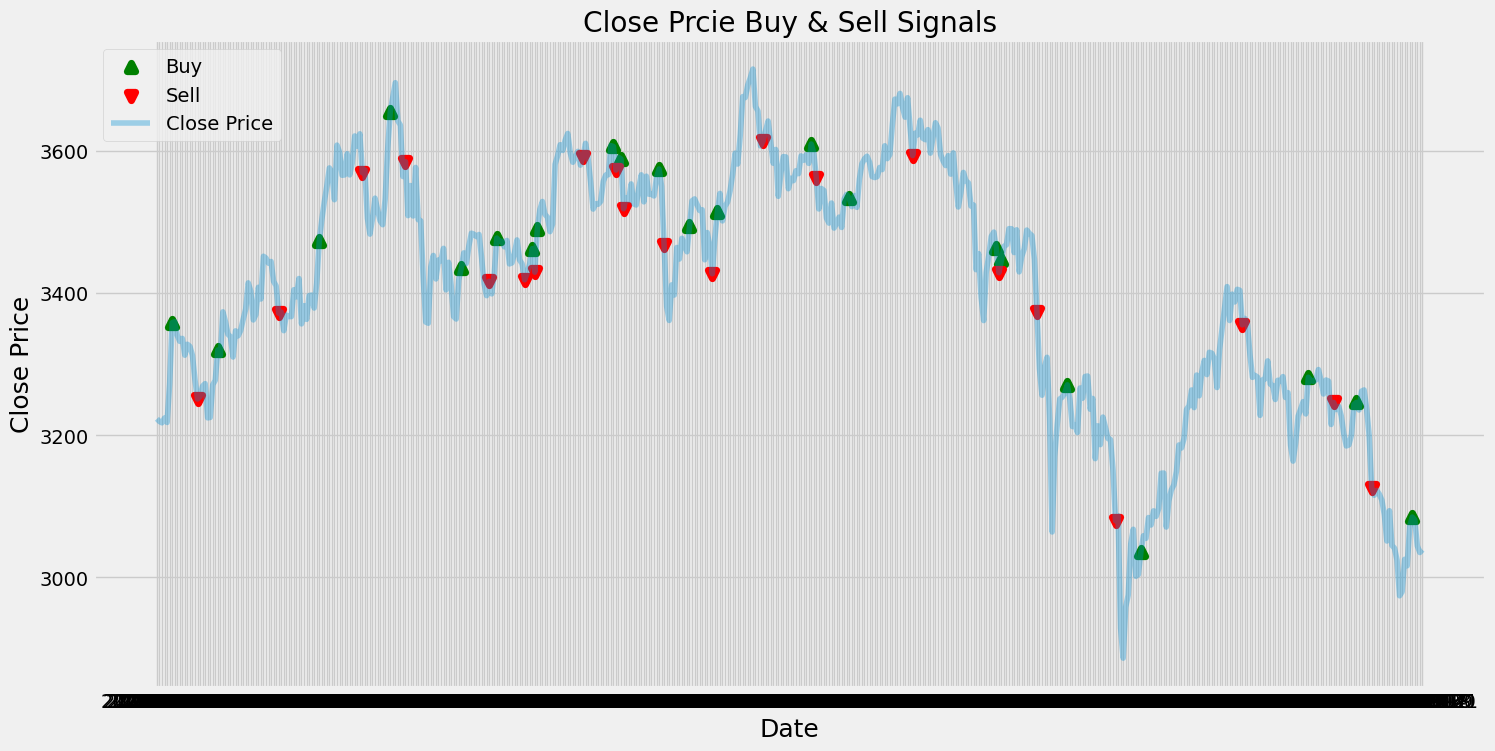

In [ ]:
period = 500  # 可视化范围
plt.figure(figsize=(16,8))
plt.scatter(df.index[-period:], df['Buy_Signal_Price'][-period:], label="Buy", color='green', marker='^',alpha=1, linewidths=5)
plt.scatter(df.index[-period:], df['Sell_Signal_Price'][-period:], label="Sell", color='red', marker='v',alpha=1, linewidths=5)
plt.plot(df['close'][-period:], label='Close Price', alpha=0.35)
plt.title('Close Prcie Buy & Sell Signals')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend(loc='upper left')
plt.show()
plt.savefig("Buy_Sell_signal.jpg")

In [9]:
his_period = 60
df['Prediction'] = df[['close']].shift(-his_period)
df.head()

,open,close,high,low,volume,money,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price,Prediction
2005-01-04,1260.78,1242.77,1260.78,1238.18,816177000.0,4.418452e+09,0.000000,0.000000,NaN,NaN,1225.49
2005-01-05,1241.68,1251.94,1258.58,1235.75,867865100.0,4.916589e+09,0.731510,0.146302,1251.94,NaN,1248.52
2005-01-06,1252.49,1239.43,1252.73,1234.24,792225400.0,4.381370e+09,0.298345,0.176711,NaN,NaN,1240.97
2005-01-07,1239.32,1244.75,1256.31,1235.51,894087100.0,5.040042e+09,0.379959,0.217360,NaN,NaN,1219.51
2005-01-10,1243.58,1252.40,1252.72,1236.09,723468300.0,4.118292e+09,1.049827,0.383854,NaN,NaN,1248.20


In [10]:
# 为了避免训练数据泄露，对signal数据进行onehot处理
df['Buy_Signal_Price'][np.invert(df['Buy_Signal_Price'].isna())] = 1
df['Buy_Signal_Price'] = df['Buy_Signal_Price'].fillna(0)

df['Sell_Signal_Price'][np.invert(df['Sell_Signal_Price'].isna())] = 1
df['Sell_Signal_Price'] = df['Sell_Signal_Price'].fillna(0)

In [11]:
# 训练集
X = np.array(df.drop(['Prediction'],1)[:-his_period])
print(X)

[[1.26078000e+03 1.24277000e+03 1.26078000e+03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.24168000e+03 1.25194000e+03 1.25858000e+03 ... 1.46301994e-01
  1.00000000e+00 0.00000000e+00]
 [1.25249000e+03 1.23943000e+03 1.25273000e+03 ... 1.76710657e-01
  0.00000000e+00 0.00000000e+00]
 ...
 [3.27872000e+03 3.27943000e+03 3.28393000e+03 ... 2.05436232e+01
  0.00000000e+00 0.00000000e+00]
 [3.29155000e+03 3.30472000e+03 3.30835000e+03 ... 1.69077995e+01
  0.00000000e+00 0.00000000e+00]
 [3.29766000e+03 3.27200000e+03 3.30053000e+03 ... 1.34859368e+01
  0.00000000e+00 0.00000000e+00]]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_23340\2277020311.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'],1)[:-his_period])


In [12]:
# 目标值
y = np.array(df['Prediction'][:-his_period])
y

array([1225.49, 1248.52, 1240.97, ..., 3044.38, 3035.05, 3038.93])

In [13]:
x_train = X[:-his_period]
x_test = X[-his_period:]
y_train = y[:-his_period]
y_test = y[-his_period:]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4204, 10) (60, 10) (4204,) (60,)


In [14]:
tree = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1).fit(x_train, y_train)

d:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [15]:
prediction = tree.predict(x_test)
print("The model training score is" , tree.score(X, y))

The model training score is 0.9936880247155964


C:\Users\lenovo\AppData\Local\Temp\ipykernel_19680\845555850.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = prediction


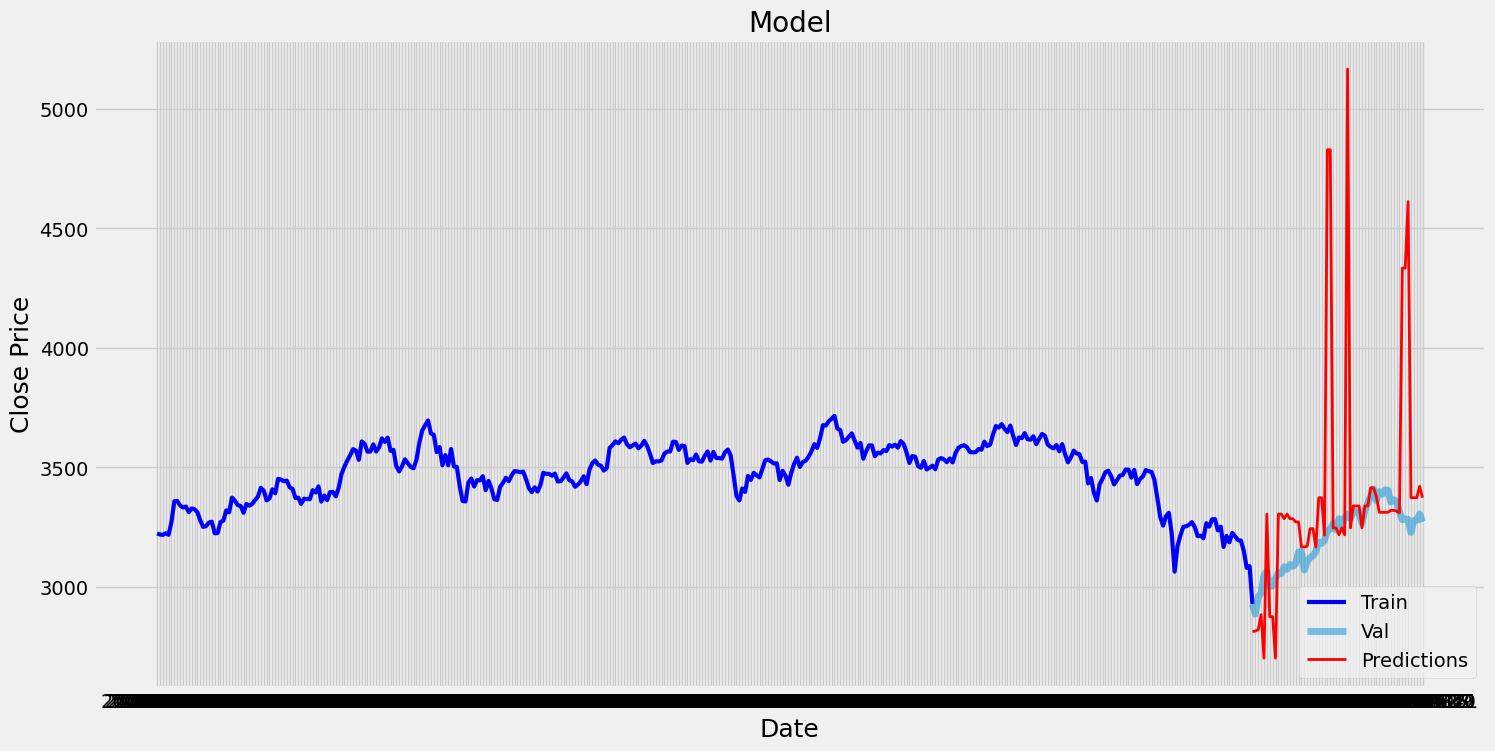

In [ ]:
period = 500  # 可视化范围
valid = df[X.shape[0]-his_period:-his_period]
valid['Prediction'] = prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(df[-period:X.shape[0]-his_period+1]['close'], linewidth=3, color='blue')
plt.plot(valid['close'], linewidth=5, alpha=0.5)
plt.plot(valid['Prediction'], linewidth=2, color='red')
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()
plt.savefig("MACD.jpg")

In [16]:
x_future = np.array(df.drop(['Prediction'], 1)[-his_period:])
prediction = tree.predict(x_future)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23340\1247965363.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = np.array(df.drop(['Prediction'], 1)[-his_period:])


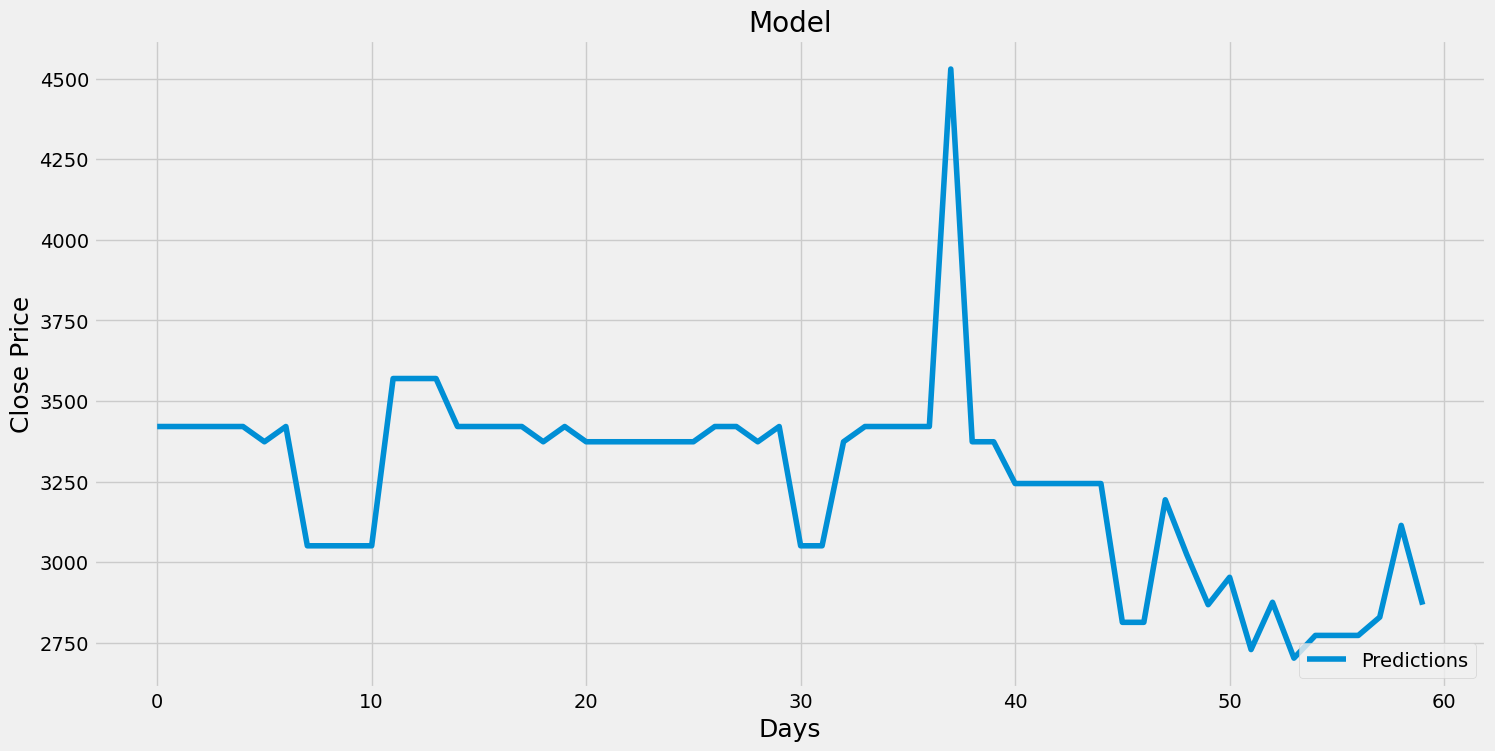

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(prediction)
plt.legend(['Predictions'], loc='lower right')
plt.show()
plt.savefig("MACE_predict.jpg")

In [17]:
prediction

array([3373.28, 3373.28, 3420.57, 3373.28, 3373.28, 3373.28, 3373.28,
       3050.59, 3050.59, 3050.59, 3050.59, 3528.68, 3528.68, 3528.68,
       3373.28, 3373.28, 3373.28, 3373.28, 3373.28, 3373.28, 3373.28,
       3373.28, 3373.28, 3624.24, 3373.28, 3624.24, 3373.28, 3624.24,
       3624.24, 3624.24, 3050.59, 3050.59, 3373.28, 3373.28, 3624.24,
       3420.57, 3420.57, 3505.28, 3624.24, 3624.24, 3170.69, 3170.69,
       2859.34, 2859.34, 2859.34, 2813.18, 2813.18, 2786.9 , 3113.89,
       2867.92, 2985.66, 2664.8 , 2885.11, 2750.3 , 3304.72, 3272.  ,
       3304.72, 3113.89, 3304.72, 2867.92])

In [18]:
tree.feature_importances_

array([1.40159011e-02, 6.23613725e-01, 5.41553335e-02, 9.88356374e-02,
       4.28648947e-02, 5.00432317e-02, 2.47407888e-02, 9.15449789e-02,
       1.53734365e-04, 3.17750303e-05])